In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('wine_data.csv')

In [3]:
df['quality_bool'] = 0
df.loc[(df['quality'] >= 7), 'quality_bool']  = 1

In [4]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bool
482,10.6,0.360,0.59,2.2,0.152,6.0,18.0,0.99860,3.04,1.05,9.4,5,0
1182,10.2,0.400,0.40,2.5,0.068,41.0,54.0,0.99754,3.38,0.86,10.5,6,0
1401,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,5,0
830,7.5,0.685,0.07,2.5,0.058,5.0,9.0,0.99632,3.38,0.55,10.9,4,0
1481,8.2,0.280,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5,0


In [5]:
df.shape

(1599, 13)

Целевой переменной будет *quality_bool*, для начала хочу посмотреть на корреляционную матрицу

In [6]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bool
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


In [7]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bool
1520,6.5,0.53,0.06,2.0,0.063,29.0,44.0,0.99489,3.38,0.83,10.3,6,0
1203,9.9,0.74,0.19,5.8,0.111,33.0,76.0,0.99878,3.14,0.55,9.4,5,0
1064,8.2,0.74,0.09,2.0,0.067,5.0,10.0,0.99418,3.28,0.57,11.8,6,0
1066,6.6,0.52,0.08,2.4,0.070,13.0,26.0,0.99358,3.40,0.72,12.5,7,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
418,11.9,0.38,0.51,2.0,0.121,7.0,20.0,0.99960,3.24,0.76,10.4,6,0
790,7.4,0.37,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,6,0
949,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7,1
696,7.0,0.65,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6,0
1507,7.5,0.38,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6,0


In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_bool            0
dtype: int64

Пропусков в данных нету... Давайте посмотрим может есть что-то похожое на выбросы

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bool
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [10]:
df[df['total sulfur dioxide'] >= 200]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bool
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7,1
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7,1


Странные значения, удалю их из выборки. Все остальные признаки ведут себя нормально, стандартизирую их и буду обучать модели

In [11]:
df.drop([1079, 1081],axis = 0, inplace=True)

Давайте посмотрим на количество представителей каждого из классов

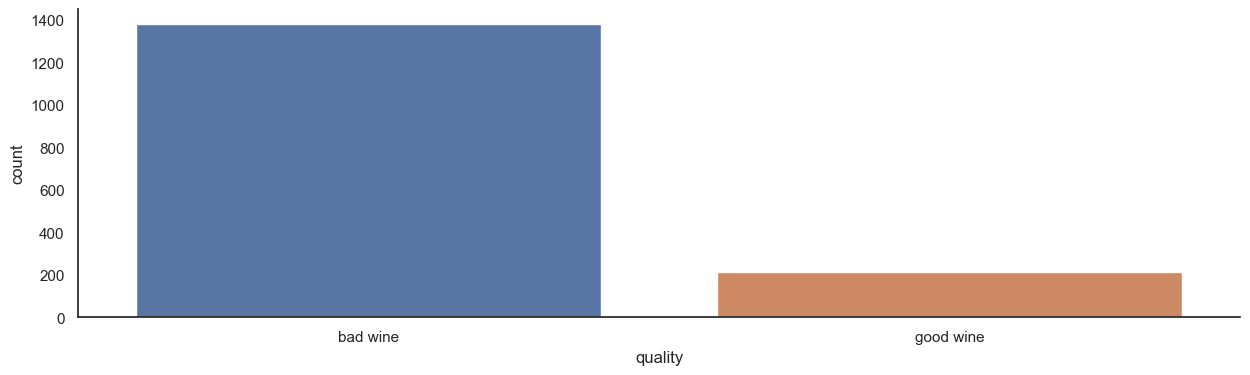

In [12]:
sns.set_style("white")
plt.figure(figsize=(15, 4))
df['quality'] = df['quality_bool']
sns.countplot(x = df['quality'])
plt.xticks([0,1], ['bad wine', 'good wine'])
sns.despine()

Дисбаланс классов на лицо - давайте сделаем оверсемплинг

In [13]:
df.drop('quality',axis = 1, inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
import sklearn.utils
from imblearn.over_sampling import SMOTE


y = df['quality_bool']
X = df.drop('quality_bool', axis = 1)

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state=69)



In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [16]:
col_trans = ColumnTransformer([
    ('scaling', StandardScaler(), X_train.columns)
])

In [17]:
X_train_scaled = col_trans.fit_transform(X_train)
X_test_scaled = col_trans.transform(X_test)

Результаты буду сравнивать между 8 моделями:
1) Log. reg. L2
2) Log. reg. L1
3) RandomForestClassifier
4) GradientBoostingClassifier
5) SVC(poly)
6) SVC(radial basis func)
7) Gaussian NB
8) DecisionTreeClassifier

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.utils.class_weight import compute_class_weight

In [19]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
xd = dict(enumerate(class_weights))

In [20]:
logregl2 = LogisticRegression(penalty='l2', class_weight=xd)
logregl1 = LogisticRegression(penalty='l1', solver = 'liblinear',class_weight=xd)
randfor = RandomForestClassifier(class_weight=xd)
gradboost = GradientBoostingClassifier()
svcpoly = SVC(kernel='poly', class_weight= xd)
svcrbf = SVC(kernel='rbf', class_weight= xd)
gaussiannb = GaussianNB()
decisiontree = DecisionTreeClassifier(class_weight = xd)

# Логистическая регрессия!

Подберу `alpha` с помощью GridSearchCV

In [21]:
cs = np.linspace(0.001, 10, 100)
searcher = GridSearchCV(logregl1, [{"C": cs}], scoring="f1", cv=10)
searcher.fit(X_train_scaled, y_train)
logregl1.set_params(C = searcher.best_params_['C'])

LogisticRegression(C=0.405,
                   class_weight={0: 1.0072916666666667, 1: 0.9928131416837782},
                   penalty='l1', solver='liblinear')

In [37]:
model_logregl1 = logregl1.fit(X_train_scaled, y_train)
y_pred = model_logregl1.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       422
           1       0.81      0.87      0.84       408

    accuracy                           0.84       830
   macro avg       0.84      0.84      0.84       830
weighted avg       0.84      0.84      0.84       830



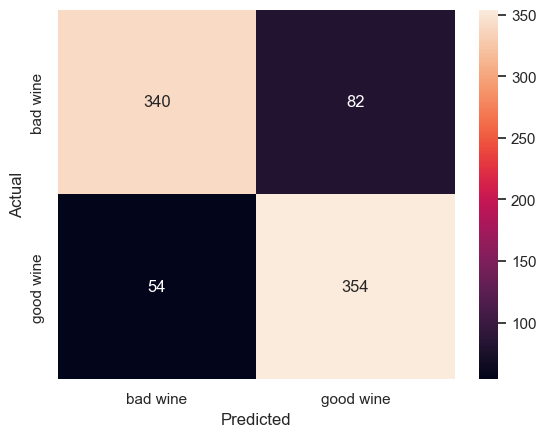

In [39]:
cm = confusion_matrix(y_test, y_pred)
labels = ['bad wine', 'good wine']
sns.heatmap(cm, annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
cs = np.linspace(0.001, 1, 100)
searcher = GridSearchCV(logregl2, [{"C": cs}], scoring="f1", cv=10)
searcher.fit(X_train_scaled, y_train)
logregl2.set_params(C = searcher.best_params_['C'])

LogisticRegression(C=0.07163636363636364,
                   class_weight={0: 1.0072916666666667, 1: 0.9928131416837782})

In [40]:
model_logregl2 = logregl2.fit(X_train_scaled, y_train)
y_pred = model_logregl2.predict(X_test_scaled)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       395
           1       0.87      0.82      0.84       435

    accuracy                           0.84       830
   macro avg       0.84      0.84      0.84       830
weighted avg       0.84      0.84      0.84       830



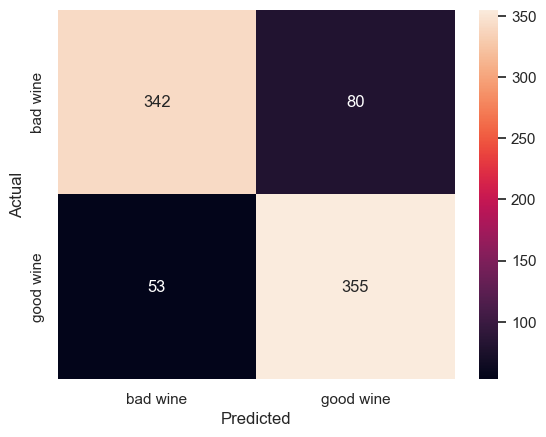

In [41]:
cm = confusion_matrix(y_test, y_pred)
labels = ['bad wine', 'good wine']
sns.heatmap(cm, annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Случайный лес, решающие деревья и градиентный бустинг!

In [25]:
n_est = [100,150,200,250]
max_depth = [3, 4, 5, 6, 7]
min_samples_split = np.arange(2, 3)
criterions = ['gini', 'entropy']
min_samples_leaf = [2, 3]
searcher = GridSearchCV(randfor, [{"n_estimators": n_est, "max_depth":max_depth, "min_samples_split" : min_samples_split, 'criterion' : criterions, 'min_samples_leaf' : min_samples_leaf}], scoring="f1", cv=10, n_jobs=-1)
searcher.fit(X_train_scaled, y_train)

randfor.set_params(
    n_estimators = searcher.best_params_['n_estimators'],
    max_depth = searcher.best_params_['max_depth'],
    min_samples_split = searcher.best_params_['min_samples_split'],
    criterion = searcher.best_params_['criterion'],
    min_samples_leaf = searcher.best_params_['min_samples_leaf']
    )

RandomForestClassifier(class_weight={0: 1.0072916666666667,
                                     1: 0.9928131416837782},
                       criterion='entropy', max_depth=7, min_samples_leaf=2,
                       n_estimators=250)

In [42]:
model_randfor = randfor.fit(X_train_scaled, y_train)
y_pred = model_randfor.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       422
           1       0.86      0.96      0.91       408

    accuracy                           0.91       830
   macro avg       0.91      0.91      0.91       830
weighted avg       0.91      0.91      0.91       830



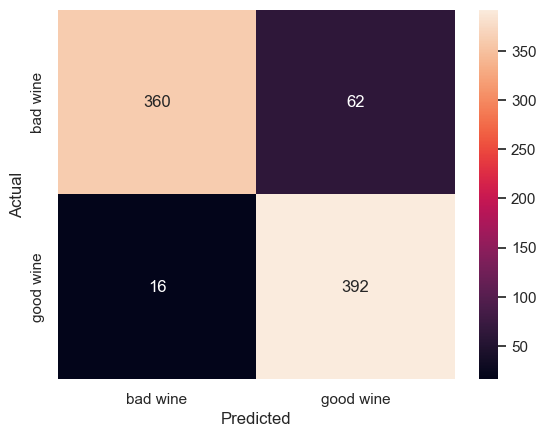

In [43]:
cm = confusion_matrix(y_test, y_pred)
labels = ['bad wine', 'good wine']
sns.heatmap(cm, annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
max_depth = [4, 5, 6, 7]
min_samples_split = np.arange(2, 5)
criterions = ['gini', 'entropy']
searcher = GridSearchCV(decisiontree, [{"max_depth":max_depth, "min_samples_split" : min_samples_split, 'criterion' : criterions}], scoring="f1", cv=10)
searcher.fit(X_train_scaled, y_train)

decisiontree.set_params(
    max_depth = searcher.best_params_['max_depth'],
    min_samples_split = searcher.best_params_['min_samples_split'],
    criterion = searcher.best_params_['criterion']
    )

DecisionTreeClassifier(class_weight={0: 1.0072916666666667,
                                     1: 0.9928131416837782},
                       max_depth=7)

In [44]:
model_decisiontree = decisiontree.fit(X_train_scaled, y_train)
y_pred = model_decisiontree.predict(X_test_scaled)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       387
           1       0.93      0.86      0.89       443

    accuracy                           0.89       830
   macro avg       0.89      0.89      0.89       830
weighted avg       0.89      0.89      0.89       830



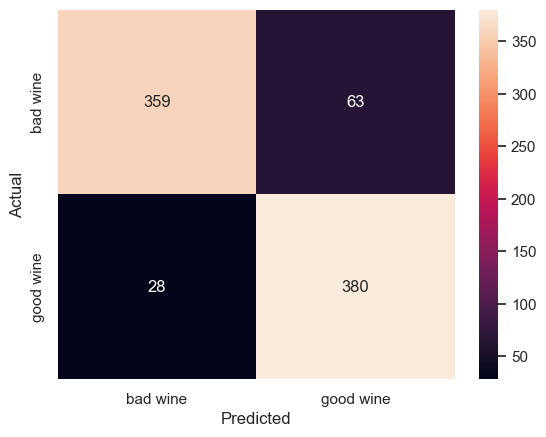

In [45]:
cm = confusion_matrix(y_test, y_pred)
labels = ['bad wine', 'good wine']
sns.heatmap(cm, annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [52]:
n_est = [100,120, 130,150]
max_depth = np.arange(4, 7)
min_samples_split = np.arange(2, 5)
searcher = GridSearchCV(gradboost, [{"n_estimators": n_est, "max_depth":max_depth, "min_samples_split" : min_samples_split}], scoring="f1", cv=5)
searcher.fit(X_train_scaled, y_train)

gradboost.set_params(
    n_estimators = searcher.best_params_['n_estimators'],
    max_depth = searcher.best_params_['max_depth'],
    min_samples_split = searcher.best_params_['min_samples_split']
    )

GradientBoostingClassifier(max_depth=6, n_estimators=150)

In [55]:
gradboost.set_params(
    n_estimators = 100,
    max_depth = 6,
    min_samples_split =3
)

GradientBoostingClassifier(max_depth=6, min_samples_split=3)

In [56]:
model_gradboost = gradboost.fit(X_train_scaled, y_train)
y_pred = model_gradboost.predict(X_test_scaled)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       405
           1       0.96      0.92      0.94       425

    accuracy                           0.94       830
   macro avg       0.94      0.94      0.94       830
weighted avg       0.94      0.94      0.94       830



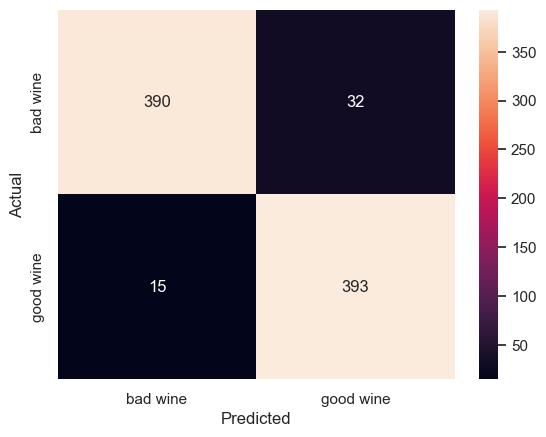

In [57]:
cm = confusion_matrix(y_test, y_pred)
labels = ['bad wine', 'good wine']
sns.heatmap(cm, annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVC!

In [32]:
cs = np.linspace(0.001, 10, 100)
searcher = GridSearchCV(svcpoly, [{"C": cs}], scoring="f1", cv=10)
searcher.fit(X_train_scaled, y_train)
svcpoly.set_params(C = searcher.best_params_['C'])

SVC(C=9.798, class_weight={0: 1.0072916666666667, 1: 0.9928131416837782},
    kernel='poly')

In [58]:
model_svcpoly = svcpoly.fit(X_train_scaled, y_train)
y_pred = model_svcpoly.predict(X_test_scaled)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       382
           1       0.92      0.83      0.87       448

    accuracy                           0.87       830
   macro avg       0.87      0.87      0.87       830
weighted avg       0.87      0.87      0.87       830



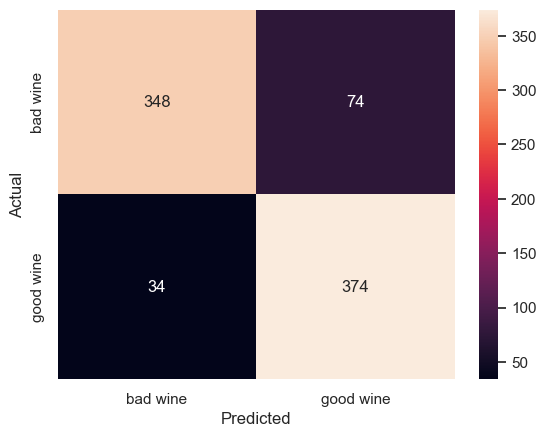

In [59]:
cm = confusion_matrix(y_test, y_pred)
labels = ['bad wine', 'good wine']
sns.heatmap(cm, annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [51]:
cs = np.linspace(0.001, 1, 100)
searcher = GridSearchCV(svcrbf, [{"C": cs}], scoring="f1", cv=10)
searcher.fit(X_train_scaled, y_train)
svcrbf.set_params(C = searcher.best_params_['C'])

SVC(C=0.9192727272727274,
    class_weight={0: 1.0072916666666667, 1: 0.9928131416837782})

In [64]:
model_svcrbf = svcrbf.fit(X_train_scaled, y_train)
y_pred = model_svcrbf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       422
           1       0.85      0.94      0.89       408

    accuracy                           0.89       830
   macro avg       0.89      0.89      0.89       830
weighted avg       0.89      0.89      0.89       830



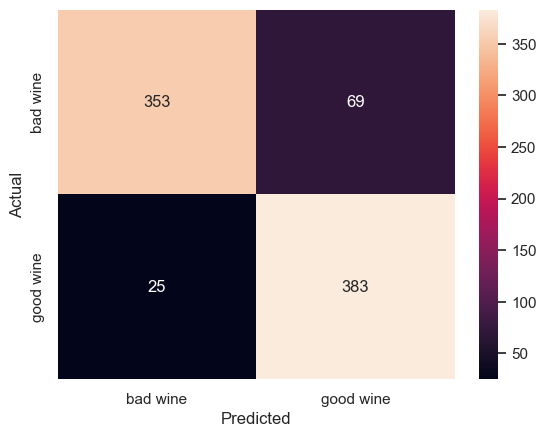

In [61]:
cm = confusion_matrix(y_test, y_pred)
labels = ['bad wine', 'good wine']
sns.heatmap(cm, annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Наивный Байес!

In [62]:
model_gaussiannb = gaussiannb.fit(X_train_scaled, y_train)
y_pred = model_gaussiannb.predict(X_test_scaled)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       362
           1       0.88      0.76      0.82       468

    accuracy                           0.81       830
   macro avg       0.81      0.81      0.81       830
weighted avg       0.82      0.81      0.81       830



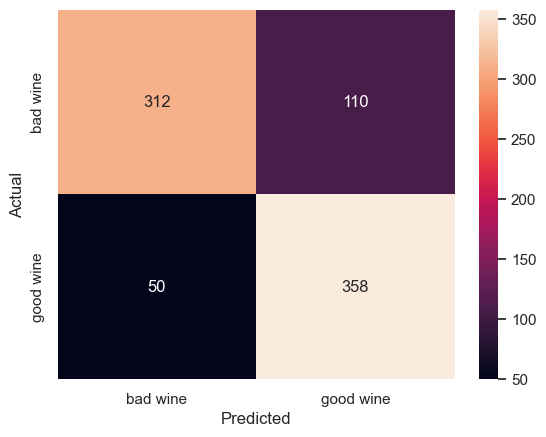

In [63]:
cm = confusion_matrix(y_test, y_pred)
labels = ['bad wine', 'good wine']
sns.heatmap(cm, annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()